In [143]:
import pandas as pd
import numpy as np
import os

In [120]:
# Load data
years = [2019, 2020, 2021, 2022, 2023, 2024]
cols = ['game_id', 'Date', 'season', 'Home', 'Away', 'jumpball_home', 'jumpball_away', 'jumpball_possession_tm']
first_basket = pd.concat([pd.read_csv(f'data/first_basket_{year}.csv') for year in years])

In [127]:
teams = [x for x in os.listdir('/Users/martinbogaert/Desktop/nba-predictor/data.nosync/rosters/2024') if '.DS_Store' not in x]

In [128]:
team_dfs = []
for tm in teams :
    paths = os.listdir(f'/Users/martinbogaert/Desktop/nba-predictor/data.nosync/rosters/2024/{tm}')
    df = [pd.read_csv(f'/Users/martinbogaert/Desktop/nba-predictor/data.nosync/rosters/2024/{tm}/{path}') for path in paths if 'roster' in path]
    team_dfs.append(pd.concat(df))

stats = pd.concat(team_dfs)

In [129]:
stats['starter'] = stats.groupby(['game_id', 'Team']).cumcount() < 5

In [130]:
stats = stats.sort_values('game_id').reset_index(drop = True)

In [133]:
stats['PTS_avg'] = stats.groupby('player_id')['PTS'].expanding().mean().reset_index(level = 0, drop = True)
stats['PTS_avg'] = stats.groupby('player_id')['PTS_avg'].shift()

In [134]:
stats = stats.merge(first_basket[['game_id', 'first_basket']],
          on = 'game_id',
          how = 'left')

In [135]:
stats['first_basket_scorer'] = (stats['player_id'] == stats['first_basket']).astype(int)

In [76]:
# Create dataframe with all rosters
    # Create starter_flag column
    # Sort dataframe by date
    # Compute rolling averages of [PTS, FGA, USG%, VORP, ...?] with player groupby

# Left merge with first_basket to create target

,game_id,Player,player_id,Team,MP,FG,FGA,FG%,3P,3PA,...,BLK%,TOV%,USG%,ORtg,DRtg,BPM,VORP,PTS_roll,first_basket,first_basket_scorer
0,202310250CHI,Torrey Craig,craigto01,CHI,21.683333,4,6,0.667,3,4,...,0.0,14.3,13.6,155.0,132.0,5.2,3.3,11.000000,willija06,0
1,202310250CHI,Andre Drummond,drumman01,CHI,15.966667,3,4,0.750,0,0,...,0.0,20.0,13.2,133.0,125.0,0.6,0.9,6.000000,willija06,0
2,202310250CHI,Jevon Carter,carteje01,CHI,15.933333,1,4,0.250,1,4,...,0.0,0.0,10.6,101.0,133.0,-6.8,-1.6,3.000000,willija06,0
3,202310250CHI,Ayo Dosunmu,dosunay01,CHI,9.300000,3,5,0.600,2,4,...,0.0,16.7,27.2,119.0,122.0,14.9,3.3,8.000000,willija06,0
4,202310250CHI,Julian Phillips,phillju01,CHI,3.666667,0,0,0.000,0,0,...,0.0,0.0,0.0,0.0,134.0,-10.1,-0.6,0.000000,willija06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,202404090CHI,Javonte Green,greenja02,CHI,30.500000,3,8,0.375,0,3,...,0.0,0.0,14.6,129.0,140.0,-7.6,-3.6,13.000000,whiteco01,0
420,202404090CHI,Alex Caruso,carusal01,CHI,37.000000,3,7,0.429,3,5,...,5.5,12.5,9.9,148.0,132.0,6.7,6.7,10.567568,whiteco01,0
421,202404090CHI,Nikola Vučević,vucevni01,CHI,38.733333,12,16,0.750,2,3,...,2.6,0.0,18.8,171.0,141.0,6.5,6.8,17.394737,whiteco01,0
422,202404090CHI,Coby White,whiteco01,CHI,42.216667,11,22,0.500,2,8,...,0.0,8.0,26.8,114.0,140.0,-3.1,-1.0,18.210526,whiteco01,1


In [136]:
stats

,game_id,Player,player_id,Team,MP,FG,FGA,FG%,3P,3PA,...,TOV%,USG%,ORtg,DRtg,BPM,VORP,starter,PTS_avg,first_basket,first_basket_scorer
0,202310240DEN,Peyton Watson,watsope01,DEN,10.833333,1,3,0.333,1,3,...,25.0,16.5,71.0,118.0,-9.3,-1.6,False,NaN,davisan02,0
1,202310240DEN,Zeke Nnaji,nnajize01,DEN,11.733333,1,3,0.333,0,1,...,20.5,18.6,96.0,123.0,-11.8,-2.4,False,NaN,davisan02,0
2,202310240DEN,Christian Braun,braunch01,DEN,19.333333,2,5,0.400,0,1,...,14.5,15.9,97.0,117.0,-6.1,-1.6,False,NaN,davisan02,0
3,202310240DEN,Reggie Jackson,jacksre01,DEN,24.066667,3,8,0.375,2,5,...,20.0,18.6,82.0,114.0,-7.8,-2.9,False,NaN,davisan02,0
4,202310240DEN,Michael Porter Jr.,portemi01,DEN,30.133333,5,13,0.385,2,9,...,0.0,19.3,111.0,104.0,-0.1,1.2,True,NaN,davisan02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26395,202404140SAS,Taj Gibson,gibsota01,DET,7.866667,1,3,0.333,0,0,...,0.0,15.9,85.0,129.0,-10.9,-1.5,False,1.684211,wisemja01,0
26396,202404140SAS,Blake Wesley,weslebl01,SAS,30.283333,7,9,0.778,1,1,...,8.8,16.3,161.0,89.0,9.5,7.3,True,4.183333,wisemja01,0
26397,202404140SAS,Devonte' Graham,grahade01,SAS,18.716667,4,8,0.500,4,7,...,27.3,25.6,104.0,104.0,-2.1,0.0,False,4.636364,wisemja01,0
26398,202404140SAS,Chimezie Metu,metuch01,DET,33.433333,4,9,0.444,1,4,...,40.0,18.8,59.0,123.0,-12.7,-7.4,True,6.460000,wisemja01,0


In [153]:
from sklearn.linear_model import LogisticRegression

starters = stats.copy()[stats['starter']][['game_id', 'player_id', 'PTS_avg', 'first_basket_scorer']].dropna()

X = starters[['PTS_avg']].to_numpy()
y = starters[['first_basket_scorer']].to_numpy()

In [154]:
model = LogisticRegression()
model.fit(X, y)

/Users/martinbogaert/anaconda3/envs/nbaenv/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [155]:
model.intercept_

array([-2.70371358])

In [156]:
pts = np.linspace(0, 35, 1000).reshape(-1, 1)
prob = model.predict_proba(pts)[:, -1]

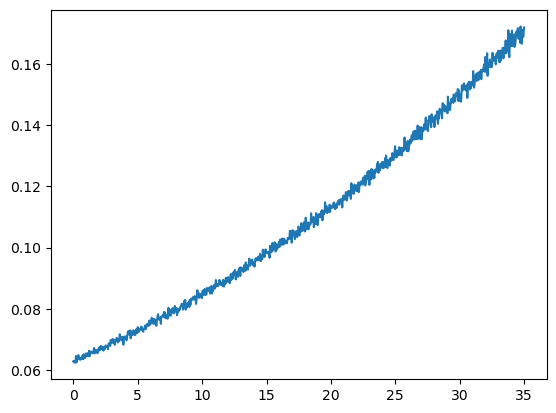

In [166]:
import matplotlib.pyplot as plt

plt.plot(pts, prob * np.random.normal(1, 0.01, (len(pts),)))

In [167]:
starters['pred'] = model.predict_proba(X)[:, -1] * np.random.normal(1, 0.01, (len(starters),))

In [169]:
starters['fb_pred'] = (starters.groupby('game_id')['pred'].transform('max') == starters['pred']).astype(int)


In [182]:
((starters['first_basket_scorer'] == 1 )& (starters['fb_pred'] == 1)).sum() / starters['game_id'].unique().shape[0]

0.1308641975308642

In [ ]:
# Every morning test:
    # Random model
    # Model that predicts highest PPG
    # Model that predicts higher rated player
    # ML model